# Setup

## Get data and put into pandas

In [19]:
import requests
import pandas as pd
import numpy as np
url = 'https://fantasy.premierleague.com/api/bootstrap-static/'
r = requests.get(url)
json = r.json()

In [88]:
elements_df = pd.DataFrame(json['elements'])
elements_types_df = pd.DataFrame(json['element_types'])
teams_df = pd.DataFrame(json['teams'])
slim_elements_df = elements_df[['second_name','team','element_type','value_season','total_points', 'now_cost']]

## Clean data

In [89]:
slim_elements_df['position'] = slim_elements_df.element_type.map(elements_types_df.set_index('id').singular_name)
slim_elements_df['team'] = slim_elements_df.team.map(teams_df.set_index('id').name)
slim_elements_df['value'] = slim_elements_df.value_season.astype(float)
slim_elements_df = slim_elements_df.drop(columns=['element_type', 'value_season'])
slim_elements_df.style.hide_index()
slim_elements_df.sort_values('value',ascending=False)

/home/ad/anaconda3/envs/fpl-ml/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/ad/anaconda3/envs/fpl-ml/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/ad/anaconda3/envs/fpl-ml/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

,second_name,team,total_points,now_cost,position,value
32,Martínez,Aston Villa,186,55,Goalkeeper,33.8
243,Dallas,Leeds,171,55,Midfielder,31.1
254,Meslier,Leeds,154,50,Goalkeeper,30.8
485,Cresswell,West Ham,153,55,Defender,27.8
40,Targett,Aston Villa,138,50,Defender,27.6
...,...,...,...,...,...,...
414,Armstrong,Southampton,0,60,Forward,0.0
415,Hart,Spurs,0,45,Goalkeeper,0.0
112,Andone,Brighton,0,50,Forward,0.0
111,Scherpen,Brighton,0,45,Goalkeeper,0.0


# Analysis

## Positional Value

Note: Players who don't play much (have a value of > 0) are removed. Don't pick players who don't play.

Outputs the mean average value of a player by position.

In [90]:
slim_elements_df = slim_elements_df.loc[slim_elements_df.value > 0]
pivot = slim_elements_df.pivot_table(index='position',values='value',aggfunc=np.mean).reset_index()
pivot.sort_values('value',ascending=False)

,position,value
2,Goalkeeper,14.817647
0,Defender,13.777165
3,Midfielder,11.757317
1,Forward,11.214894


### Positional total points
Mean total points of players with a value of over 15 (not shit players)

In [91]:
slim_high_value_elements_df = slim_elements_df.loc[slim_elements_df.value > 15]
pivot = slim_high_value_elements_df.pivot_table(index='position',values='total_points',aggfunc=np.mean).reset_index()
pivot.sort_values('total_points',ascending=False)

,position,total_points
1,Forward,147.866667
2,Goalkeeper,129.166667
3,Midfielder,125.300000
0,Defender,104.688525


## Team Value

Same game but by teams

In [92]:
team_pivot = slim_elements_df.pivot_table(index='team',values='value',aggfunc=np.mean).reset_index()
team_pivot.sort_values('value',ascending=False)

,team,value
10,Man City,15.261905
7,Leeds,15.021053
17,West Ham,14.945000
8,Leicester,13.842857
4,Chelsea,13.780000
1,Aston Villa,13.461905
0,Arsenal,13.382609
2,Brighton,13.160000
11,Man Utd,12.673913
5,Crystal Palace,12.357895


## Most valuable player by position

In [93]:
fwd_df = slim_elements_df.loc[slim_elements_df.position == 'Forward']
mid_df = slim_elements_df.loc[slim_elements_df.position == 'Midfielder']
def_df = slim_elements_df.loc[slim_elements_df.position == 'Defender']
goal_df = slim_elements_df.loc[slim_elements_df.position == 'Goalkeeper']

### Keepers

In [94]:
# Value players
goal_df.sort_values('value',ascending=False).head(10)

,second_name,team,total_points,now_cost,position,value
32,Martínez,Aston Villa,186,55,Goalkeeper,33.8
254,Meslier,Leeds,154,50,Goalkeeper,30.8
165,Guaita,Crystal Palace,124,45,Goalkeeper,27.6
416,Lloris,Spurs,149,55,Goalkeeper,27.1
296,Santana de Moraes,Man City,160,60,Goalkeeper,26.7
482,Fabianski,West Ham,133,50,Goalkeeper,26.6
504,dos Santos Patrício,Wolves,132,50,Goalkeeper,26.4
0,Leno,Arsenal,131,50,Goalkeeper,26.2
127,Pope,Burnley,144,55,Goalkeeper,26.2
212,Schmeichel,Leicester,128,50,Goalkeeper,25.6


In [95]:
# points players
goal_df.sort_values('total_points',ascending=False).head(10)

,second_name,team,total_points,now_cost,position,value
32,Martínez,Aston Villa,186,55,Goalkeeper,33.8
296,Santana de Moraes,Man City,160,60,Goalkeeper,26.7
254,Meslier,Leeds,154,50,Goalkeeper,30.8
416,Lloris,Spurs,149,55,Goalkeeper,27.1
127,Pope,Burnley,144,55,Goalkeeper,26.2
268,Ramses Becker,Liverpool,140,60,Goalkeeper,23.3
160,Mendy,Chelsea,140,60,Goalkeeper,23.3
482,Fabianski,West Ham,133,50,Goalkeeper,26.6
504,dos Santos Patrício,Wolves,132,50,Goalkeeper,26.4
0,Leno,Arsenal,131,50,Goalkeeper,26.2


<AxesSubplot:>

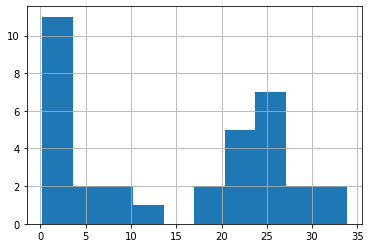

In [96]:
# Value spread
goal_df.value.hist()

<AxesSubplot:>

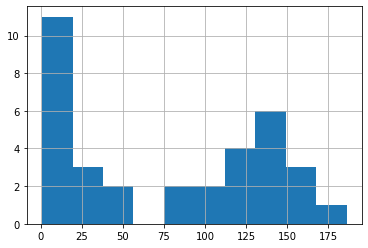

In [97]:
# Total Points Spread
goal_df.total_points.hist()

### Defenders

In [98]:
# Value players
def_df.sort_values('value',ascending=False).head(10)

,second_name,team,total_points,now_cost,position,value
485,Cresswell,West Ham,153,55,Defender,27.8
40,Targett,Aston Villa,138,50,Defender,27.6
328,Wan-Bissaka,Man Utd,144,55,Defender,26.2
93,Dunk,Brighton,130,50,Defender,26.0
492,Coufal,West Ham,128,50,Defender,25.6
39,Mings,Aston Villa,128,50,Defender,25.6
193,Keane,Everton,127,50,Defender,25.4
46,Konsa Ngoyo,Aston Villa,119,50,Defender,23.8
301,Gato Alves Dias,Man City,142,60,Defender,23.7
506,Coady,Wolves,106,45,Defender,23.6


In [99]:
# points players
def_df.sort_values('total_points',ascending=False).head(10)

,second_name,team,total_points,now_cost,position,value
271,Robertson,Liverpool,161,70,Defender,23.0
274,Alexander-Arnold,Liverpool,160,75,Defender,21.3
485,Cresswell,West Ham,153,55,Defender,27.8
328,Wan-Bissaka,Man Utd,144,55,Defender,26.2
301,Gato Alves Dias,Man City,142,60,Defender,23.7
152,Chilwell,Chelsea,139,60,Defender,23.2
295,Cancelo,Man City,138,60,Defender,23.0
40,Targett,Aston Villa,138,50,Defender,27.6
93,Dunk,Brighton,130,50,Defender,26.0
291,Stones,Man City,128,55,Defender,23.3


<AxesSubplot:>

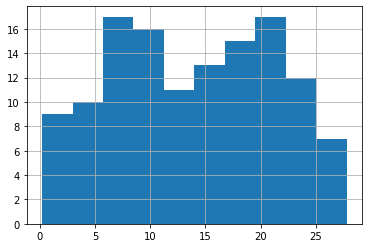

In [100]:
# Value spread
def_df.value.hist()

<AxesSubplot:>

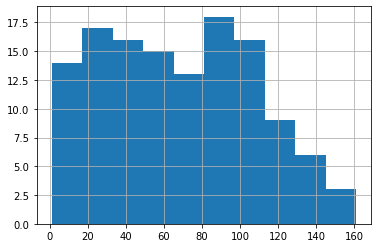

In [101]:
# Total Points Spread
def_df.total_points.hist()

### Midfielders

In [102]:
# Value players
mid_df.sort_values('value',ascending=False).head(10)

,second_name,team,total_points,now_cost,position,value
243,Dallas,Leeds,171,55,Midfielder,31.1
255,Harrison,Leeds,160,60,Midfielder,26.7
496,Soucek,West Ham,147,60,Midfielder,24.5
398,Ward-Prowse,Southampton,156,65,Midfielder,24.0
422,Son,Spurs,228,100,Midfielder,22.8
34,Traoré,Aston Villa,135,60,Midfielder,22.5
494,Bowen,West Ham,141,65,Midfielder,21.7
428,Højbjerg,Spurs,107,50,Midfielder,21.4
289,Gündogan,Man City,157,75,Midfielder,20.9
497,Fornals,West Ham,125,60,Midfielder,20.8


In [103]:
# points players
mid_df.sort_values('total_points',ascending=False).head(10)

,second_name,team,total_points,now_cost,position,value
318,Borges Fernandes,Man Utd,244,120,Midfielder,20.3
270,Salah,Liverpool,231,125,Midfielder,18.5
422,Son,Spurs,228,100,Midfielder,22.8
267,Mané,Liverpool,176,120,Midfielder,14.7
322,Rashford,Man Utd,174,95,Midfielder,18.3
243,Dallas,Leeds,171,55,Midfielder,31.1
255,Harrison,Leeds,160,60,Midfielder,26.7
289,Gündogan,Man City,157,75,Midfielder,20.9
398,Ward-Prowse,Southampton,156,65,Midfielder,24.0
294,Sterling,Man City,154,110,Midfielder,14.0


<AxesSubplot:>

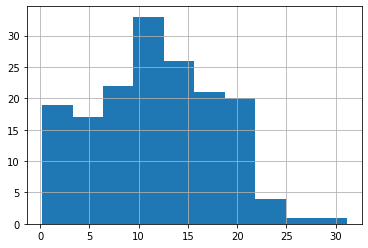

In [104]:
# Value spread
mid_df.value.hist()

<AxesSubplot:>

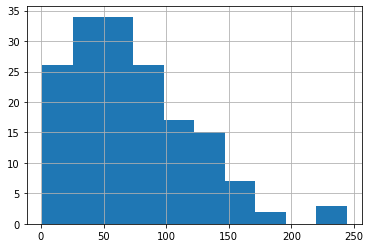

In [105]:
# Total Points Spread
mid_df.total_points.hist()

### Forwards

In [106]:
# Value players
fwd_df.sort_values('value',ascending=False).head(10)

,second_name,team,total_points,now_cost,position,value
244,Bamford,Leeds,194,80,Forward,24.2
41,Watkins,Aston Villa,168,75,Forward,22.4
201,Calvert-Lewin,Everton,165,80,Forward,20.6
124,Wood,Burnley,138,70,Forward,19.7
402,Adams,Southampton,137,70,Forward,19.6
420,Kane,Spurs,242,125,Forward,19.4
342,Wilson,Newcastle,134,75,Forward,17.9
217,Vardy,Leicester,187,105,Forward,17.8
55,Ings,Aston Villa,131,80,Forward,16.4
204,de Andrade,Everton,123,75,Forward,16.4


In [107]:
# points players
fwd_df.sort_values('total_points',ascending=False).head(10)

,second_name,team,total_points,now_cost,position,value
420,Kane,Spurs,242,125,Forward,19.4
244,Bamford,Leeds,194,80,Forward,24.2
217,Vardy,Leicester,187,105,Forward,17.8
41,Watkins,Aston Villa,168,75,Forward,22.4
201,Calvert-Lewin,Everton,165,80,Forward,20.6
265,Firmino,Liverpool,141,90,Forward,15.7
124,Wood,Burnley,138,70,Forward,19.7
402,Adams,Southampton,137,70,Forward,19.6
342,Wilson,Newcastle,134,75,Forward,17.9
3,Aubameyang,Arsenal,131,100,Forward,13.1


<AxesSubplot:>

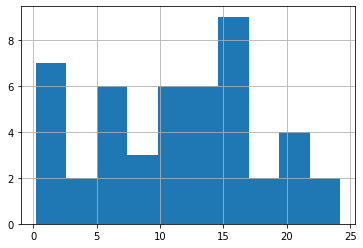

In [108]:
# Value spread
fwd_df.value.hist()

<AxesSubplot:>

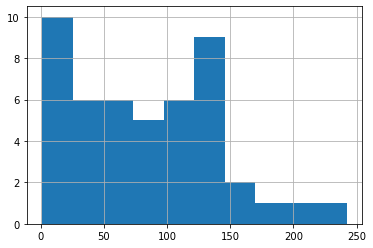

In [109]:
# Total Points Spread
fwd_df.total_points.hist()

## Value and points teams

In [115]:
metric_type = 'total_points'

total_points_team_df = pd.concat([
  goal_df.sort_values(metric_type,ascending=False).head(2),
  def_df.sort_values(metric_type,ascending=False).head(5),
  mid_df.sort_values(metric_type,ascending=False).head(5),
  fwd_df.sort_values(metric_type,ascending=False).head(3)
], ignore_index=False)

metric_type = 'value'

value_team_df = pd.concat([
  goal_df.sort_values(metric_type,ascending=False).head(2),
  def_df.sort_values(metric_type,ascending=False).head(5),
  mid_df.sort_values(metric_type,ascending=False).head(5),
  fwd_df.sort_values(metric_type,ascending=False).head(3)
], ignore_index=False)

d = {'Total Points': [total_points_team_df.total_points.sum(), value_team_df.total_points.sum()], 'Value': [total_points_team_df.value.sum(), value_team_df.value.sum()], 'Cost': [total_points_team_df.now_cost.sum(), value_team_df.now_cost.sum()]}
df = pd.DataFrame(data=d, index=['Total Points', 'Value',])

### Points Team

In [116]:
total_points_team_df.head(20)

,second_name,team,total_points,now_cost,position,value
32,Martínez,Aston Villa,186,55,Goalkeeper,33.8
296,Santana de Moraes,Man City,160,60,Goalkeeper,26.7
271,Robertson,Liverpool,161,70,Defender,23.0
274,Alexander-Arnold,Liverpool,160,75,Defender,21.3
485,Cresswell,West Ham,153,55,Defender,27.8
328,Wan-Bissaka,Man Utd,144,55,Defender,26.2
301,Gato Alves Dias,Man City,142,60,Defender,23.7
318,Borges Fernandes,Man Utd,244,120,Midfielder,20.3
270,Salah,Liverpool,231,125,Midfielder,18.5
422,Son,Spurs,228,100,Midfielder,22.8


### Value Team

In [117]:
value_team_df.head(20)

,second_name,team,total_points,now_cost,position,value
32,Martínez,Aston Villa,186,55,Goalkeeper,33.8
254,Meslier,Leeds,154,50,Goalkeeper,30.8
485,Cresswell,West Ham,153,55,Defender,27.8
40,Targett,Aston Villa,138,50,Defender,27.6
328,Wan-Bissaka,Man Utd,144,55,Defender,26.2
93,Dunk,Brighton,130,50,Defender,26.0
492,Coufal,West Ham,128,50,Defender,25.6
243,Dallas,Leeds,171,55,Midfielder,31.1
255,Harrison,Leeds,160,60,Midfielder,26.7
496,Soucek,West Ham,147,60,Midfielder,24.5


In [118]:
### Total points and total value of the 2 teams

In [119]:
df.head()

,Total Points,Value,Cost
Total Points,2782,338.5,1300
Value,2422,394.1,940


# Futher analysis

Prehaps the most interesting stat to come from the value analysis was the correlation between MST calling a player a twat in the 20/21 season and their likelyhood of ending up in the top 10 best value players of their position. A **100%** record.

**Good value twats:** Bamford, Soucek, Ward-Prowse, Richarleson